In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
print(df.shape)
df.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df["age"].fillna(df["age"].median(), inplace=True)

df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

df["embark_town"].fillna(df["embark_town"].mode()[0], inplace=True)

df.drop(columns=["deck"], inplace=True)

print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


## Plot target variable distribution

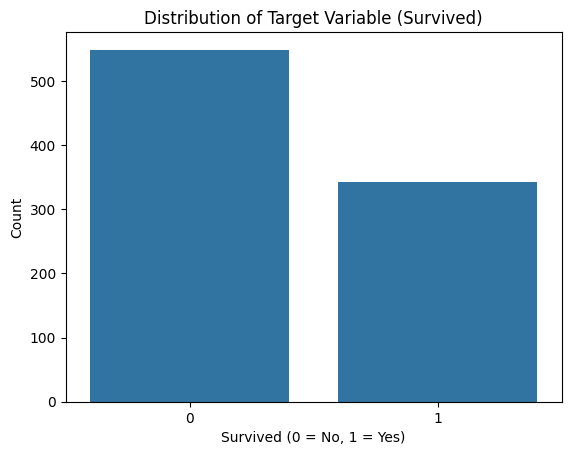


Value Counts for survived:
0    61.616162
1    38.383838
Name: survived, dtype: float64


In [8]:
# Plot target variable distribution
plt.figure()
sns.countplot(data=df, x="survived")
plt.title("Distribution of Target Variable (Survived)")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Optional: show percentage
print("\nValue Counts for survived:")
print(df["survived"].value_counts(normalize=True) * 100)

## Categorical Variables Plots

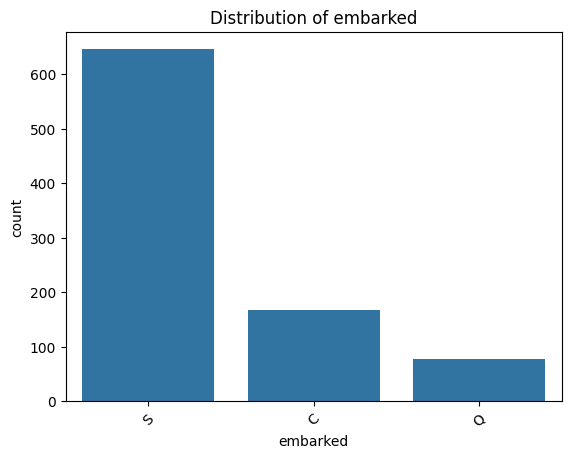


Value Counts for embarked:
S    646
C    168
Q     77
Name: embarked, dtype: int64
----------------------------------------


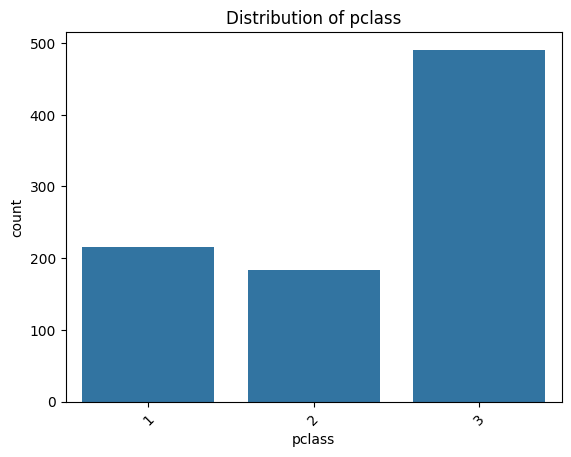


Value Counts for pclass:
3    491
1    216
2    184
Name: pclass, dtype: int64
----------------------------------------


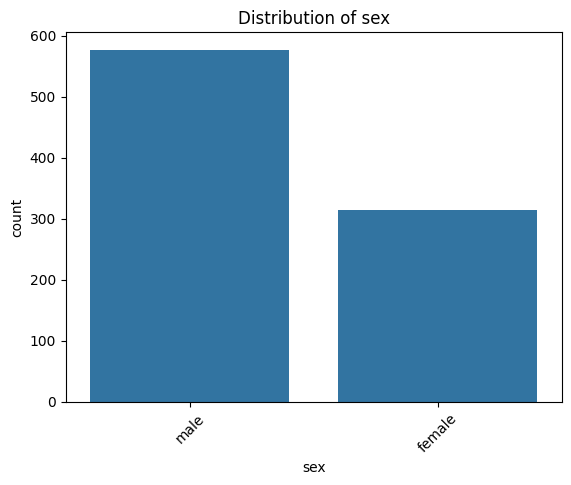


Value Counts for sex:
male      577
female    314
Name: sex, dtype: int64
----------------------------------------


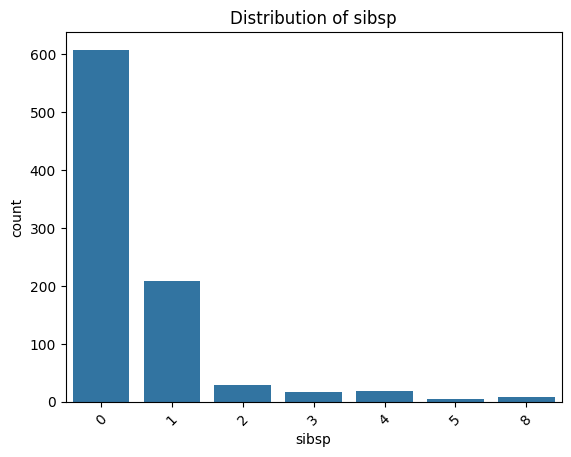


Value Counts for sibsp:
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64
----------------------------------------


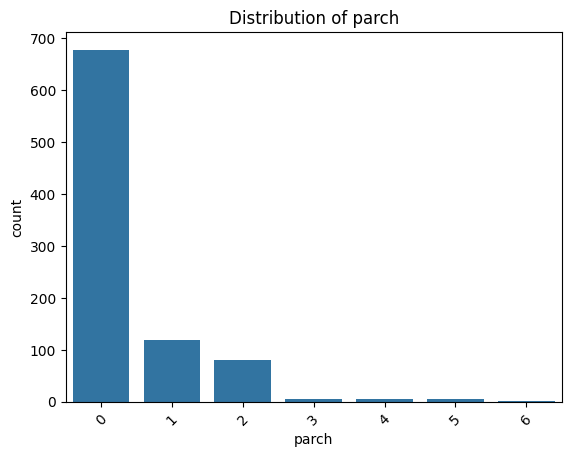


Value Counts for parch:
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64
----------------------------------------


In [9]:
categorical_cols = ["embarked", "pclass", "sex", "sibsp", "parch"]

for col in categorical_cols:
    
    # Plot
    plt.figure()
    ax = sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    
    plt.show()
    
    # Numerical output (counts)
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())
    print("-" * 40)


## Numerical Variables Plots

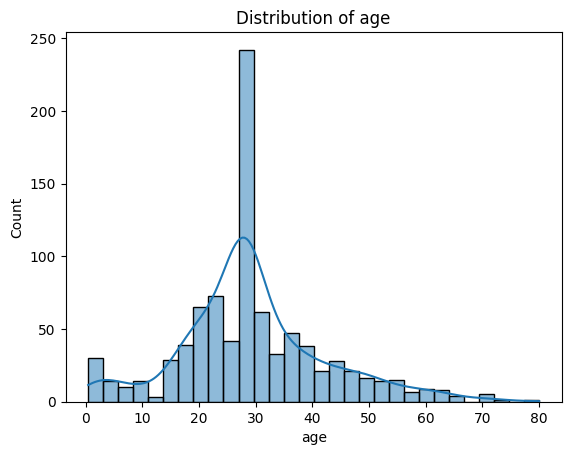


Summary Statistics for age:
mean    29.36
50%     28.00
std     13.02
min      0.42
max     80.00
Name: age, dtype: float64
----------------------------------------


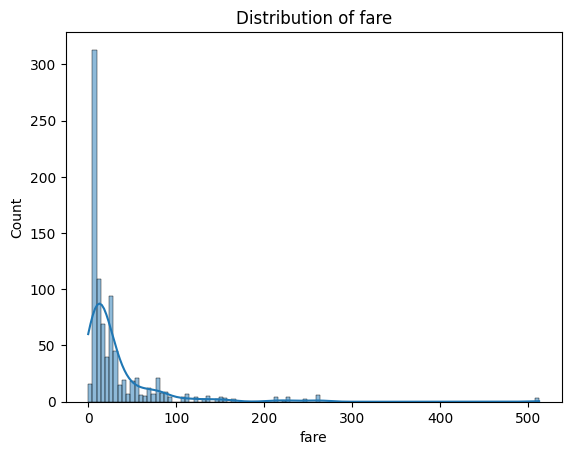


Summary Statistics for fare:
mean     32.20
50%      14.45
std      49.69
min       0.00
max     512.33
Name: fare, dtype: float64
----------------------------------------


In [10]:
numerical_cols = ["age", "fare"]

for col in numerical_cols:
    
    plt.figure()
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
    
    print(f"\nSummary Statistics for {col}:")
    print(df[col].describe()[["mean", "50%", "std", "min", "max"]].round(2))
    print("-"*40)


## Survival rate

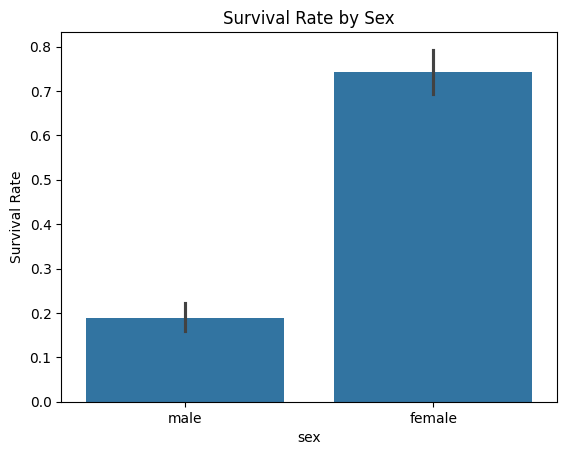


Survival Rate by Sex:
sex
female    0.742
male      0.189
Name: survived, dtype: float64

Counts by Sex:
male      577
female    314
Name: sex, dtype: int64
----------------------------------------


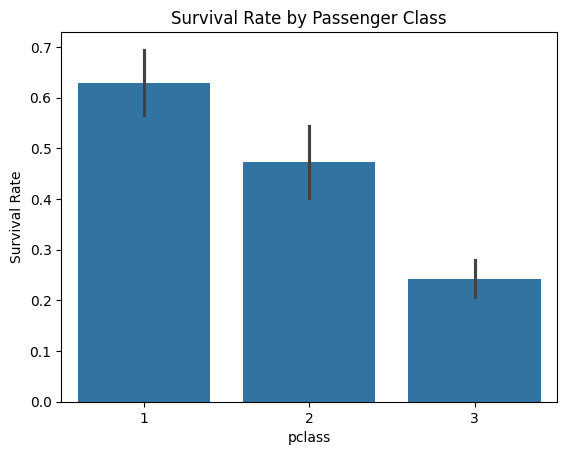


Survival Rate by Passenger Class:
pclass
1    0.630
2    0.473
3    0.242
Name: survived, dtype: float64

Counts by Passenger Class:
3    491
1    216
2    184
Name: pclass, dtype: int64
----------------------------------------


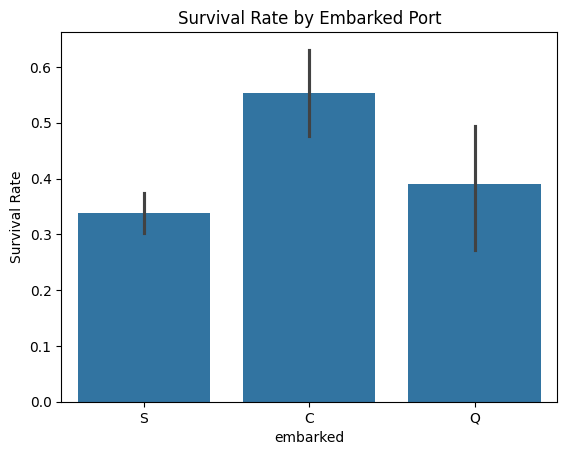


Survival Rate by Embarked Port:
embarked
C    0.554
Q    0.390
S    0.339
Name: survived, dtype: float64

Counts by Embarked Port:
S    646
C    168
Q     77
Name: embarked, dtype: int64
----------------------------------------


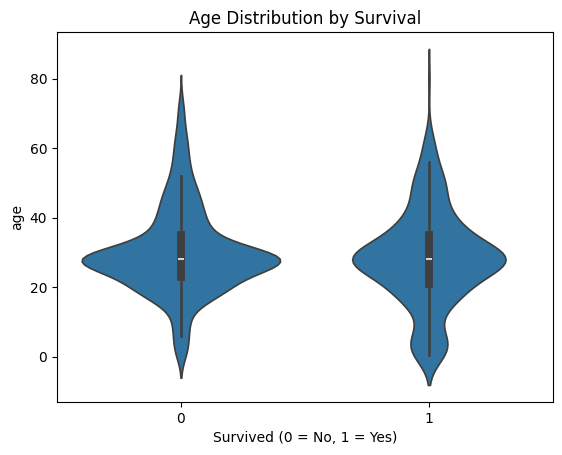


Average Age by Survival:
survived
0    30.03
1    28.29
Name: age, dtype: float64
----------------------------------------


In [11]:
# -----------------------------
# Survival rate by Sex
# -----------------------------
plt.figure()
sns.barplot(data=df, x="sex", y="survived")
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.show()

print("\nSurvival Rate by Sex:")
print(df.groupby("sex")["survived"].mean().round(3))
print("\nCounts by Sex:")
print(df["sex"].value_counts())
print("-"*40)


# -----------------------------
# Survival rate by Passenger Class
# -----------------------------
plt.figure()
sns.barplot(data=df, x="pclass", y="survived")
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

print("\nSurvival Rate by Passenger Class:")
print(df.groupby("pclass")["survived"].mean().round(3))
print("\nCounts by Passenger Class:")
print(df["pclass"].value_counts())
print("-"*40)


# -----------------------------
# Survival rate by Embarked Port
# -----------------------------
plt.figure()
sns.barplot(data=df, x="embarked", y="survived")
plt.title("Survival Rate by Embarked Port")
plt.ylabel("Survival Rate")
plt.show()

print("\nSurvival Rate by Embarked Port:")
print(df.groupby("embarked")["survived"].mean().round(3))
print("\nCounts by Embarked Port:")
print(df["embarked"].value_counts())
print("-"*40)


# -----------------------------
# Age distribution
# -----------------------------
plt.figure()
sns.violinplot(data=df, x="survived", y="age")
plt.title("Age Distribution by Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.show()

print("\nAverage Age by Survival:")
print(df.groupby("survived")["age"].mean().round(2))
print("-"*40)


## Heatmap

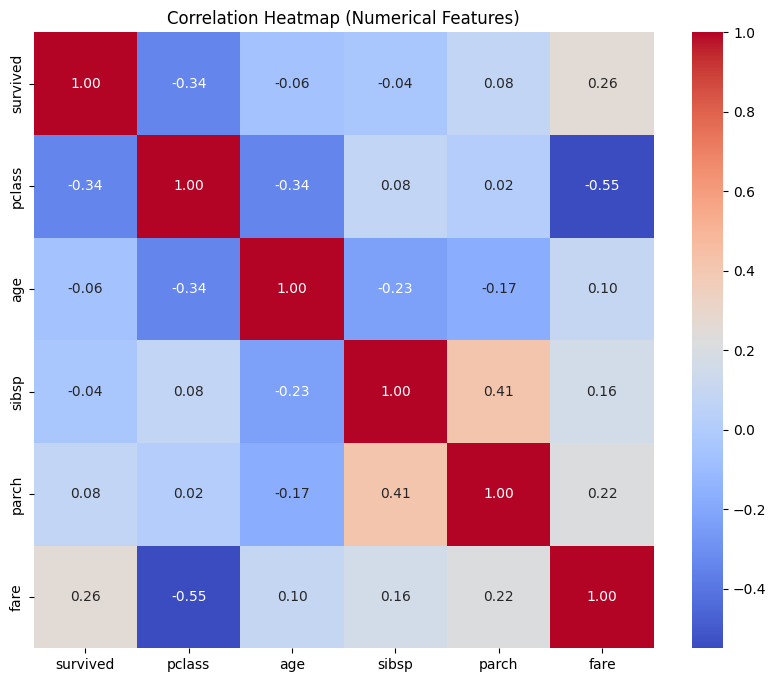

In [12]:
# Select only numerical columns
num_cols = df.select_dtypes(include=["int64", "float64"])

# Compute correlation matrix
corr_matrix = num_cols.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

In [13]:
print("\nCorrelation with Survived:")
print(corr_matrix["survived"].sort_values(ascending=False))


Correlation with Survived:
survived    1.000000
fare        0.257307
parch       0.081629
sibsp      -0.035322
age        -0.064910
pclass     -0.338481
Name: survived, dtype: float64


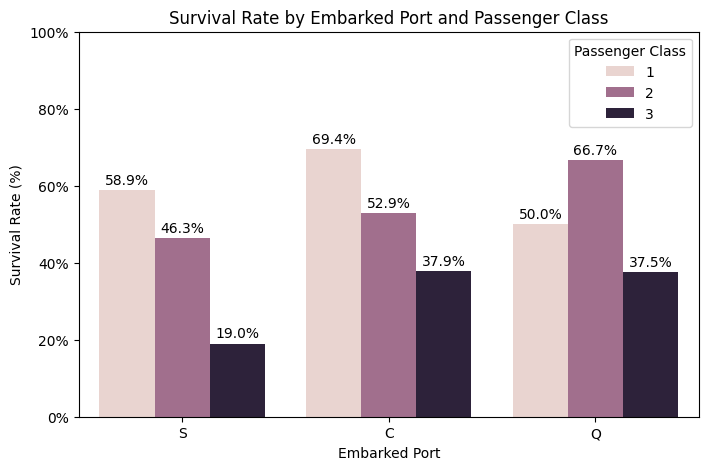

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

ax = sns.barplot(
    data=df,
    x="embarked",
    y="survived",
    hue="pclass",
    errorbar=None
)

plt.title("Survival Rate by Embarked Port and Passenger Class")
plt.xlabel("Embarked Port")
plt.ylabel("Survival Rate (%)")

ax.set_ylim(0, 1)

ax.yaxis.set_major_formatter(lambda x, _: f'{int(x*100)}%')

for container in ax.containers:
    ax.bar_label(
        container,
        fmt=lambda x: f'{x*100:.1f}%',
        label_type='edge',
        padding=2
    )

plt.legend(title="Passenger Class")
plt.show()

In [21]:
# Survival Rate
rate = df.pivot_table(
    values="survived",
    index="embarked",
    columns="pclass",
    aggfunc="mean"
)

rate = (rate * 100).round(1)

print("\nSurvival Rate (%)\n by Embarkation Port & Class")
print("_" * 30)
print(rate)


# Passenger Count
count = df.pivot_table(
    values="survived",
    index="embarked",
    columns="pclass",
    aggfunc="count"
)

print("\nPassenger Count\n by Embarkation Port & Class")
print("_" * 30)
print(count)


Survival Rate (%)
 by Embarkation Port & Class
______________________________
pclass       1     2     3
embarked                  
C         69.4  52.9  37.9
Q         50.0  66.7  37.5
S         58.9  46.3  19.0

Passenger Count
 by Embarkation Port & Class
______________________________
pclass      1    2    3
embarked               
C          85   17   66
Q           2    3   72
S         129  164  353
